# Project: Investigate a Dataset - No-Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> I've chosen the No-Show Appointments dataset. It collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. The set has 12 columns regarding the patient info, such as personal information, hometown, medical records and finally whether the patient was notified or not.


### Question(s) for Analysis
> The question I'm going to ask is: What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? Can it be the diseases they have, their location, the time between scheduling the call and the apointment or maybe because of not being notified by an SMS, we're going to find that out through our analysis.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import pr_functions as func
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Dataset Observations
> We can see that the set consists of 110527 records and 14 columns.

> There are no missing values in any column. However, there are some wrong values in some columns.

> The average age is around 37 years, around 10% of the population have scholarship, 20% have hipertension, 7% have diabetes, 3% are alcoholic and 32% received an SMS.

> The handicap column can't be exactly measured, since we have 4 degrees of handicap, so I'm going to either change the values to 0 and 1 to facilitate the calculations or deal with it as it is.

> The "no-show" column is in string "Yes" & "No" values, the yes means that the patient didn't attend and vise versa, which might cause some confusion. To simplify the analysis further more I'll use numerical values "0 & 1" instead of the string values.



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 


### Data Cleaning and Transforming
> In this section I'll clean up the data, giving reasons why I chose to do so.

> First, let's get all the columns to be lowercase.

In [6]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.columns= df.columns.str.lower()

In [7]:
df.drop(['appointmentid'], axis=1, inplace=True)

In [8]:
df.head()

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> Here I removed the two columns 'patientid' and 'appointmentid' since they are unique for each patient.

In [9]:
df = df[df.age != -1]

In [10]:
df['handcap'].replace({2: 1, 3: 1, 4:1}, inplace=True)
df['no-show'].replace({'Yes': 0, 'No':1}, inplace=True)

In [11]:
df.describe()

,patientid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
count,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,37.089219,0.098266,0.197248,0.071865,0.030400,0.020276,0.321029,0.798066
std,2.560943e+14,23.110026,0.297676,0.397923,0.258266,0.171686,0.140943,0.466874,0.401445
min,3.921784e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.173184e+13,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.438963e+13,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> Here I removed the value "-1" from the age column, since it didn't have an actual meaning.

> I also replaced the handicap levels of (2,3,4) to be 1, just like the rest of the diseases, to simplify our analysis.

> I changed the "Yes" and "No" values in "no-show" column to 1 "attended" and 0 "no-show", to make the numerical analysis easier.

In [12]:
dup_patient = df[df.duplicated(['patientid'])]
dup_patient['patientid'].shape

(48228,)

>  After checking for duplicates, it was found that we have nearly 48000 duplicates in our set, meaning that we only have around 62000 unique patients, and that every patient has an average of 1.8 appointments scheduled.
>  To further investigate this let's check the patients with more than one appointment in the next section to see what their numbers look like.

In [13]:
pat_dup_col = dup_patient['patientid'].value_counts()
pat_dup_col.describe()

count    24379.000000
mean         1.978260
std          2.372108
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         87.000000
Name: patientid, dtype: float64

In [14]:
df.drop(['patientid'], axis=1, inplace=True)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1


> From the above investigation we can see that these 48000 duplicated entries belong to nearly 24000 patients. So every patient of them has nearly 2 extra duplicate appointments.

> So the final conclusion of the duplication topic is that there are nearly 62000 unique patients, 38000 of them have one appointment and the rest 24000 have an average of 3 appointments each.

> Finally, I'll consider the duplication irrelevant to our analysis, and consider that each row is a unique entry. Therefore I'll discard the 'patientid' column since it won't be adding any value.

In [15]:
df['appointmentday'] =  pd.to_datetime(df['appointmentday']).dt.date
df['scheduledday'] =  pd.to_datetime(df['scheduledday']).dt.date
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1


> The final step of data cleaning is converting both "scheduledday" & "appointmentday" columns to date format, to see if the difference between appointment and reservation dates has an effect on the no-show %.

<a id='eda'></a>
## Exploratory Data Analysis

> In this section I'm going to explore the dataset, keeping in mind the main question of the analysis: What factors affect the No-Show % most? And how are these factors correlated?


### Research Main Question (What are the factors affecting the No-Show %?)

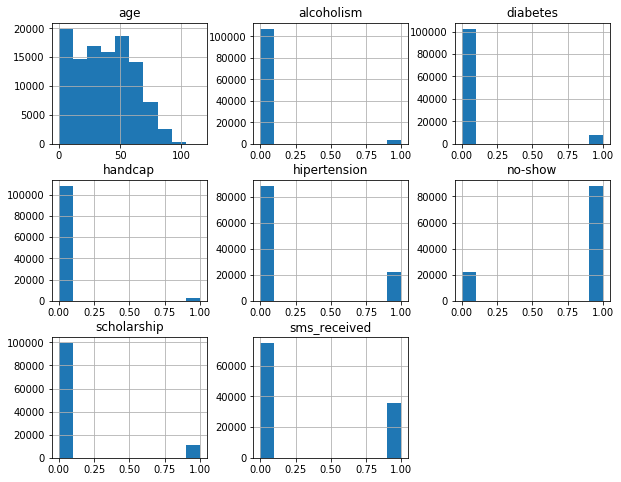

In [16]:
df.hist(figsize=(10,8));

> As I stated, the main question is checking the reasons why the patients didn't show, so the 'no-show' column is my dependant, all the other columns are independants.

> To facilitate the calculations, I'll create a filter to divide the data into "attend" for people who attended and "absent" for people who didn't.

In [17]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
attended = df['no-show']==1
absent = df['no-show']==0
attended.value_counts()

True     88207
False    22319
Name: no-show, dtype: int64

> It seems that around 88000 patient "80% of the patients" attended their appointments.

## Funcitons Section:
> Here I'm going to put the finctions I'm going to use in the analysis.

In [18]:
def hist_plot(df,a,b,c):
    plt.figure()
    df[a][attended].hist()
    df[a][absent].hist()
    plt.legend(['attended','Absent'])
    plt.ylabel('Number of Patients')
    plt.xlabel(b)
    plt.title(c)
    plt.show()

> The above is the first function, I'm going to use it to plot histograms.

In [19]:
def series_plot(df,a,b,c,d):
    plt.figure()
    df.groupby(a).mean()['no-show'].plot.line(figsize=b, xticks=c);
    plt.legend(['Attending Rate'])
    df.groupby(a).count()['no-show'].plot.line(secondary_y=True, style='g', figsize=b, xticks=c);
    plt.legend(['Number of Patients'])
    plt.title(d)
    plt.show()

> The above is the second function, I'm going to use it to plot bivariate series functions.

### Research Sub Question 1 (How does receiving an SMS affect the No-Show %?)

> My first question is to check whether receiving an SMS affects the no-show % or not, I'm expecting that the people who received an SMS should have a higher chance of attending.

In [20]:
df.sms_received[attended].mean()

0.29133742220005215

In [21]:
df.sms_received[absent].mean()

0.43837089475334917

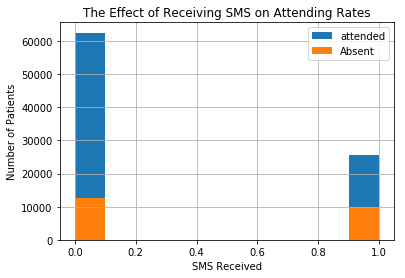

In [22]:
hist_plot(df,'sms_received','SMS Received','The Effect of Receiving SMS on Attending Rates')

> In the above graph the blue column is the "attended", while the orange is the "absent". We can see that the number of patients who received an SMS is inversly proportional to the number of patients who attended, which doesn't make sense, so we'll explore further relations.

### Research Sub Question 2 (Does the neighbourhood affect the No-Show %?)

> Now let's check the highest and lowest neighbourhoods attending rates, and see how many attended from each one.

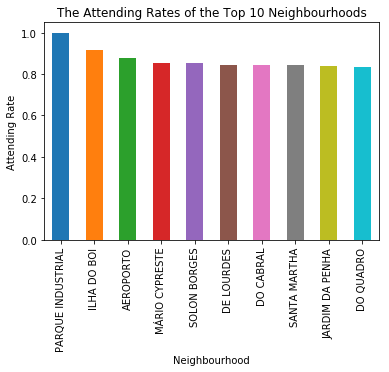

In [23]:
df.groupby('neighbourhood').mean()['no-show'].sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('Attending Rate')
plt.xlabel('Neighbourhood')
plt.title('The Attending Rates of the Top 10 Neighbourhoods')
plt.show()

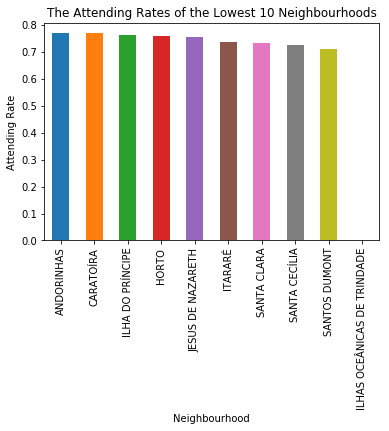

In [24]:
df.groupby('neighbourhood').mean()['no-show'].sort_values(ascending=False).tail(10).plot.bar()
plt.ylabel('Attending Rate')
plt.xlabel('Neighbourhood')
plt.title('The Attending Rates of the Lowest 10 Neighbourhoods')
plt.show()

In [25]:
df.groupby('neighbourhood').mean()['no-show'].describe()

count    81.000000
mean      0.794572
std       0.097230
min       0.000000
25%       0.782546
50%       0.802412
75%       0.820093
max       1.000000
Name: no-show, dtype: float64

> In the above graphs we can see the top 10 cities with attending % and the bottom 10.

> It seems that most of the cities have an attending percentige ranging from 78% to 82% with "Parque Industrial" as the highest city with attending percentage of 100%. However, the city with 0% needs further investigating to see what are the reasons, and what is the number of people in that city.

In [26]:
df.loc[df['neighbourhood'] == 'ILHAS OCEÂNICAS DE TRINDADE']

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
48754,F,2016-04-14,2016-05-13,51,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,0
48765,F,2016-04-14,2016-05-13,58,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,0


> Since the city has only 2 patients, it's normal that the attending percentage is 0%.

### Research Sub Question 3 (Does How does the age affect the No-Show %?)

> Next, let's find out the relation between age and attending the appointment.

In [27]:
df.age[attended].mean()

37.790504154999034

In [28]:
df.age[absent].mean()

34.317666562121957

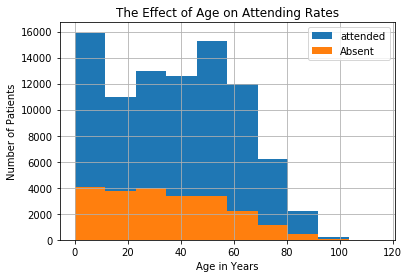

In [29]:
hist_plot(df,'age','Age in Years','The Effect of Age on Attending Rates')

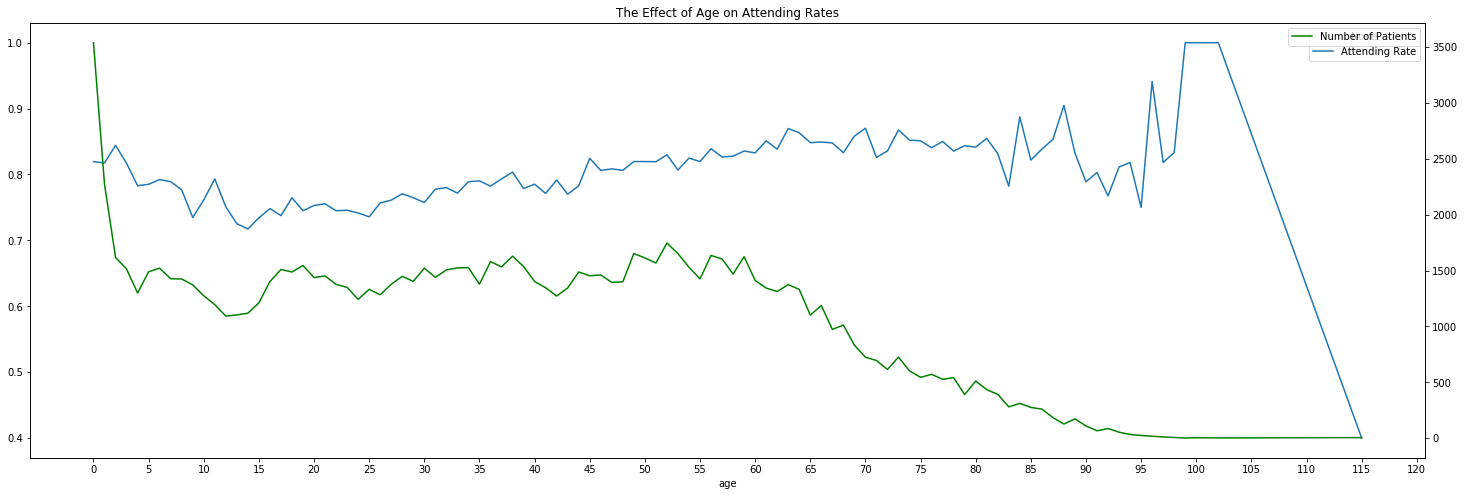

In [30]:
series_plot(df,'age',(25,8),list(range(0,121,5)),'The Effect of Age on Attending Rates')

> In the plot above we can deduce some results, the plot compares between the attending percentage of each age group "blue" and the number of patients in the same age group "green".


> The blue plot is the main one of this analysis to show us whether there's a relation between between age and attedning, the other plot was made just to make sure that the analysis is effective "meaning that there're no outliers or abnormal values due to the low number of patients in that certain age.


>### From the above analysis we can see that the data is divided into 3 intervals;

>1st interval (0-13 years): the percentage of patients attending decreases as the age increases, which seems logical, since the babies and children need the utmost medical attention.

>2nd interval (13-80 years): the percentage of patients attending increases as the age increases, which also seems logical, since as people get older they tend to need more medical attention.

>3rd interval (80-115 years): the number of patients of this interval is very low, risking that a few patients could affect our analysis numbers and trend in a wrong way, hence it isn't reliable and won't be included in the analysis.


### Research Sub Question 4 (How does "gender" affect the No-Show %?)

In [31]:
df.groupby('gender').mean()['no-show']

gender
F    0.796851
M    0.800321
Name: no-show, dtype: float64

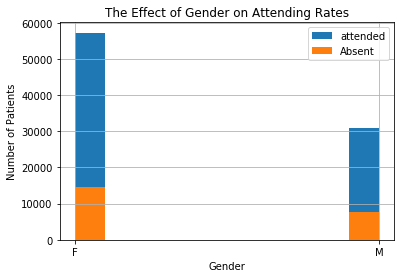

In [32]:
hist_plot(df,'gender','Gender','The Effect of Gender on Attending Rates')

> In the above graph the blue column is the "attended", while the orange is the "absent". We can see that the percentage of mails and females are nearly the same, which mean that the gender doesn't have any effect on our attending rates.

### Research Sub Question 5 (How does most common disease "hipertension" affect the No-Show %?)

In [33]:
df.hipertension[attended].mean()

0.20439420907637715

In [34]:
df.hipertension[absent].mean()

0.16900398763385457

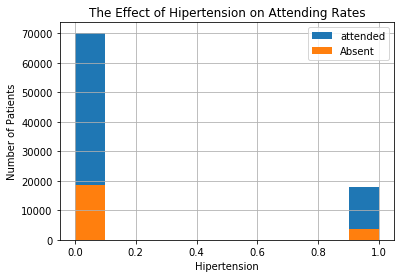

In [35]:
hist_plot(df,'hipertension','Hipertension','The Effect of Hipertension on Attending Rates')

> In the above graph the blue column is the "attended", while the orange is the "absent". We can see that the percentage of the patients with hipertension is 20.5% from who attended, while it's only 16% from the absent patients, which makes sense, as the people with lifelong diseases need extra medical attention.

### Research Sub Question 6 (How does time variance between reservation and appointment dates affect the No-Show %?)
> First we need to get the variance between reservation and appointment dates in a new column, so as to compare it to the attending rates and build the analysis.

In [36]:
df['time_diff']=df['appointmentday']-df['scheduledday']
df['time_diff'].describe()

count                     110526
mean     10 days 04:24:39.789370
std      15 days 06:07:14.979140
min            -6 days +00:00:00
25%              0 days 00:00:00
50%              4 days 00:00:00
75%             15 days 00:00:00
max            179 days 00:00:00
Name: time_diff, dtype: object

In [37]:
df['time_diff']=pd.to_datetime(df['time_diff']).astype(int)/(.864*10e13)
df['time_diff'].describe()

count    110526.000000
mean         10.183794
std          15.255034
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: time_diff, dtype: float64

In [38]:
df.loc[df['time_diff'] < 0]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,time_diff
27033,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,0,-1.0
55226,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,0,-1.0
64175,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,0,-1.0
71533,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,0,-6.0
72362,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,0,-1.0


> First, I converted the time_diff column from date to numbers, to be easier in calculations and plotting.

> From the above we deduce that there are 5 data entry errors, where the appointment date is after scheduled date, so we'll remove these values from this analysis by filtering them out, not dropping them completely.

In [39]:
df1 = df[df.time_diff >= 0]

In [40]:
#attended1 = df1['no-show']==1
#absent1 = df1['no-show']==0

In [41]:
df1.time_diff[attended].mean()

8.7547586926207668

In [42]:
df1.time_diff[absent].mean()

15.835484449224701

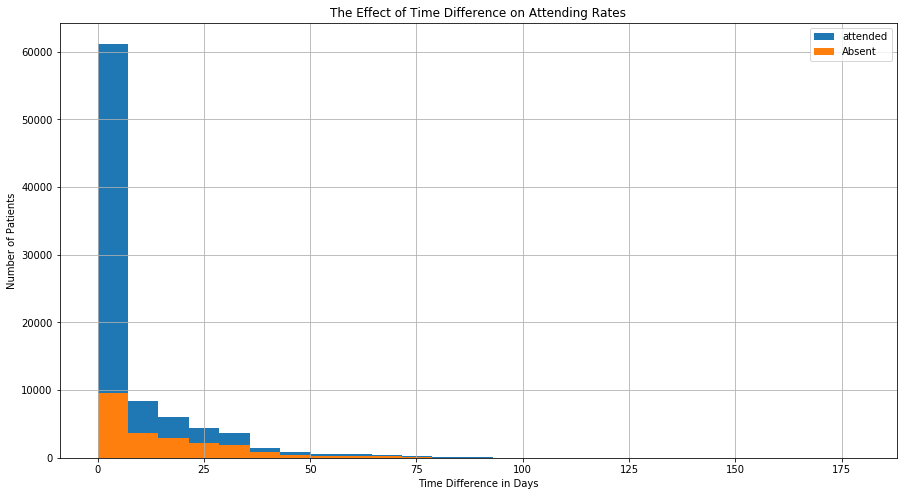

In [43]:
df1.time_diff[attended].hist(figsize=(15,8),bins=25)
df1.time_diff[absent].hist(figsize=(15,8),bins=25)
plt.legend(['attended','Absent'])
plt.ylabel('Number of Patients')
plt.xlabel('Time Difference in Days')
plt.title('The Effect of Time Difference on Attending Rates')
plt.show()

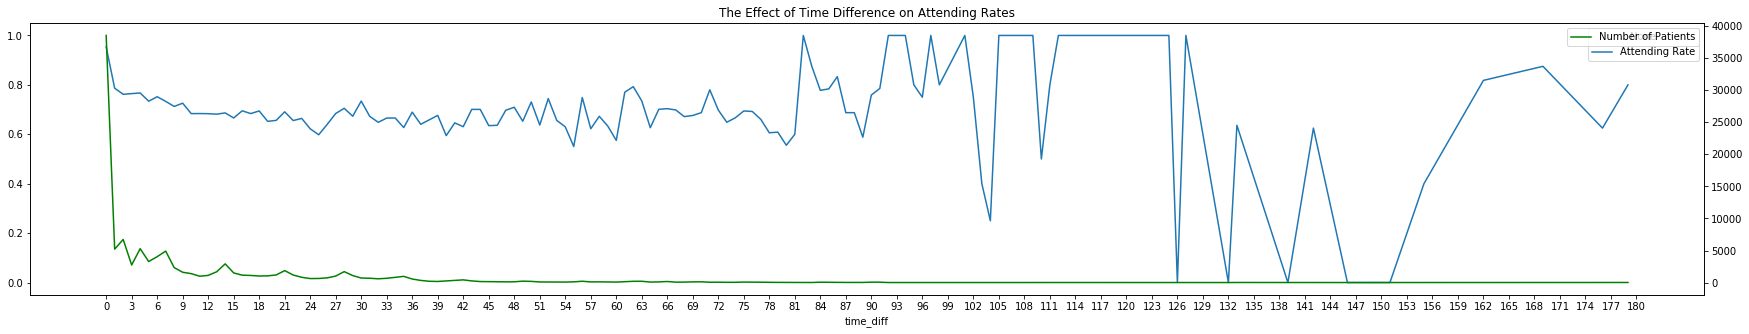

In [44]:
series_plot(df1,'time_diff',(30,5),list(range(0,181,3)),'The Effect of Time Difference on Attending Rates')

> The plot above compares between the attending percentage of each group "blue" and the number of patients in the same group "green".

> The blue plot is the main one of this analysis to show us whether there's a relation between reservation and appointment dates and attending, the other plot was made just to make sure that the analysis is effective "meaning that there're no outliers or abnormal values due to the very low or high number of patients.

In [45]:
df1.groupby('time_diff').mean()['no-show'].head(1)

time_diff
0.0    0.953529
Name: no-show, dtype: float64

In [46]:
df1.groupby('time_diff').count()['no-show'].head(1)

time_diff
0.0    38562
Name: no-show, dtype: int64

> It seems that the the most concentration of attending no.s is for the patients who reserved at the same day, with nearly 38500 patients having an attending percentage of nearly 95%. So to see  more accurate effect of the rest of the values we will exclude the same day reservation values from our analysis and see the rest of the results.

In [47]:
df2 = df[df.time_diff > 0]

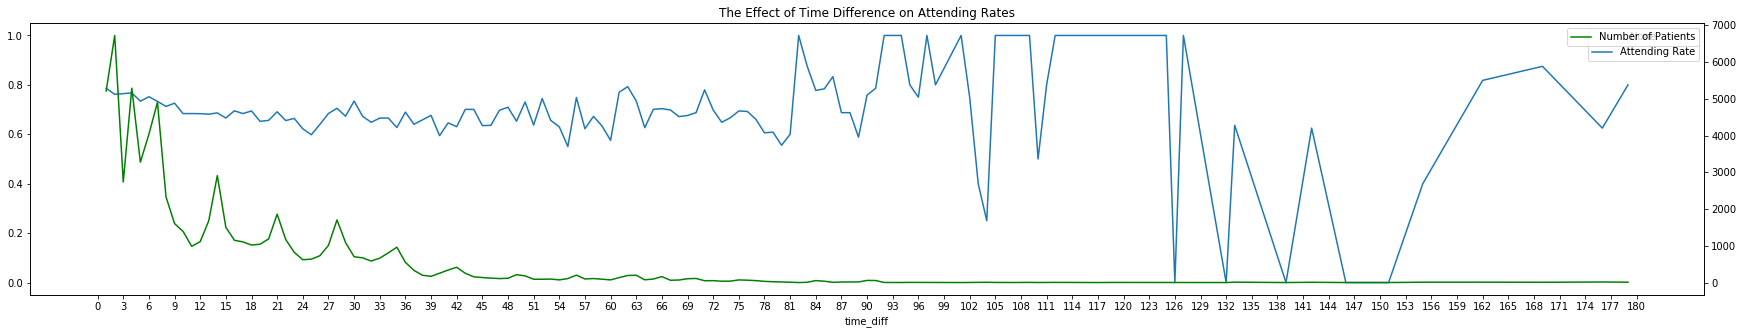

In [48]:
series_plot(df2,'time_diff',(30,5),list(range(0,181,3)),'The Effect of Time Difference on Attending Rates')

> After removing the condensed same day data, the graph and trend became more clear. However, the outcome didn't change, it just became clearer.

>### From the above analysis we can see that the data is divided into 3 intervals;

>1st interval (0-40 days): the percentage of patients attending decreases as the days difference increases, meaning that the closer the date of the appointment to the reservation, the patients seem to attend more. The best example of this is the attending percentage of the patients that reserved at the same day, which is nearly 95% "the highest percentage".

>2nd interval (40-80 days): the percentage of patients attending flactuates as the age increases, but it's nearly the same without having a clear rising or dropping trend. Which means that early reserving "40 days or more" have a similar behaviour regardless of the time difference.

>3rd interval (80-179 days): the number of patients of this interval is very low, risking that a few patients could affect our analysis numbers and trend in a wrong way, hence it isn't reliable and won't be included in the analysis.

<a id='conclusions'></a>
## Conclusions
> The main question of the analysis was "Which factors affect the no-show %?" Then I asked 6 sub questions, investigating the relationship between 5 attributes and the attending %, and what effect did these attributes have on the outcome if any.

> Knowing that the attributes I made my analysis around were "sms_received", "neighbourhood", "age", "gender, "hipertension" and "time variance between appointment and reservation".

> As per the analysis 3 factors had a reasonable effect on the attending % which are: "age", "hipertension" and "time variance between appointment and reservation". While the the "sms_received" had a not logical results due to insufficiency of the data regarding sending and receiving these SMSs. Finally, the last two factors: "neighbourhood" and "gender" nearly didn't have any effect on the attending rates.

> Let's first discuss the non-useful factors: the neighborhood case, it was because there was no further data regarding their charecteristics, plus most of the data was around the mean "the interquartile range was between 78% and 82%". Regarding the "gender" factor, there was no difference between the gender when it comes to attending rates.

> The first factor that had a reasonable effect on the analysis was the age, through the plot I could see a clear trend, babies need the most medical attention, so they have the highest attending rates, the rates begin to decrease then, after the youth age, their attending rates begin to increase again as the person gets older. So, as a conclusion, yes I beleive that age affects the attending rates of the patients.

>The second factor is hipertension, I chose it out of allthe diseases because it was the most common disease "around 20% of the patients had it" which is higher than the rest of the diseases altogether. The percentage of people with hipertension that attended is higher than those who were absent. Which is an indicator that having a disease increases the chance of attending.

>The third and final factor is the time variance between appointment and reservation dates. Through the plot I could see a clear trend, near appointments have the highest attending rates, especially the ones booked at the same day, since the people need them urgently, and don't have much space to forget. The attending rates decrease along the way as the no. of days increase, which is also logical since people tend to forget future events when they're further away. So, as a conclusion, yes I beleive that difference between appointment and reservation dates affects the attending rates of the patients.


>### Finally these are the quesitons that can be further investigated if we had more data to answer them:
> My first question was about knowing the reason behind the lower percentage of patients attending when they received an SMS. There might be different reasons to it, such as saving a wrong number, not updating the patients number, sending a wrong appointment time or date or a failure in sending the SMS due to some technical or network issue. knowing such reasons would give us more insight to why the patients who should've received an SMS have a high no-show rate.

> The second group of questions I had was about knowing the geographic characteristics of each of the mentioned neighbourhoods, here are some of the questions I wanted to ask to see if I can categorize them or add them to groups. Which neighboorhoods were adjacent, which ones were wealthy and which were poor, the location of the medical center inside each neighbourhood and how well equipped is the medical center of each neighborhood. Knowing the answers to these questions would have surely given us more insights to the analysis. 


## Limitations

> The first limitation I faced was having no explanation for some unreasonable data or results, which requires access to further data that isn't available in this project. The unknown data such as the hanicap levels, and the appointments column which don't have an appointment added to them. The results that needed more investigation, such as the effect of receiving and SMS and the effect of the neighbourhood on the results, which requires further investigation.

> The second limitation was the wrong values in some of the columns, such as the negative value in the ae column, and the reservation dates that are after the appointment dates. Since I couldn't get their corrct values, I had to either drop or filter them out, thankfully they weren't many rows so it didn't have much effect on the analysis.

In [49]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0